Install World Bank Python library: **wbgapi** provides a comprehensive interface to the World Bank's data and metadata APIs, more deatils available at - https://pypi.org/project/wbgapi/

In [1]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\prati\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:

# pip install pandas


**World Bank: Data Collection and Preprocessing**

In [3]:
## Import necessary libraries

import wbgapi as wb
import pandas as pd

Get all Sustainable Development Goals(SDG) Attributes using wbgapi

SDG metrics are available under database id 46

In [4]:
# # 46	Sustainable Development Goals	SDG

all_items = []

wb.db = 46                            ## set the db id for following step
for item in wb.series.list():               ## get all indicators/items from the db
  item['db_name'] = 'Sustainable Development Goals'
  item['code'] = 'SDG'
  all_items.append(item)

In [5]:
## form WB SDG feture Dataframe

wb_sdg_features = pd.DataFrame( all_items).sort_values(by='value')
wb_sdg_features.head()

,id,value,db_name,code
15,EG.CFT.ACCS.ZS,Access to clean fuels and technologies for coo...,Sustainable Development Goals,SDG
19,EG.ELC.ACCS.ZS,Access to electricity (% of population),Sustainable Development Goals,SDG
17,EG.ELC.ACCS.RU.ZS,"Access to electricity, rural (% of rural popul...",Sustainable Development Goals,SDG
18,EG.ELC.ACCS.UR.ZS,"Access to electricity, urban (% of urban popul...",Sustainable Development Goals,SDG
69,FX.OWN.TOTL.ZS,Account ownership at a financial institution o...,Sustainable Development Goals,SDG


In [6]:
## List of metrics/features we are interested in

wb_feature_list = [
                'GDP per capita (current US$)',
                'Access to electricity (% of population)',
                'Urban population (% of total population)',
                'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)',
                'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)',
                'Poverty headcount ratio at national poverty lines (% of population)',
                'Rural poverty headcount ratio at national poverty lines (% of rural population)',
                'Urban poverty headcount ratio at national poverty lines (% of urban population)',
                'Literacy rate, youth total (% of people ages 15-24)',
                'Literacy rate, adult total (% of people ages 15 and above)',
                'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources',
                'Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)',
                'Annual freshwater withdrawals, total (% of internal resources)',
                'Annual freshwater withdrawals, total (billion cubic meters)',
                'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
                'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)',
                'Annual freshwater withdrawals, industry (% of total freshwater withdrawal)',
                'People using at least basic sanitation services (% of population)',
                'People using at least basic sanitation services, rural (% of rural population)',
                'People using at least basic sanitation services, urban (% of urban population)',
                'Investment in water and sanitation with private participation (current US$)',
                'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)',
                'Access to electricity (% of population)',
                'People using at least basic drinking water services (% of population)',
                'Gross capital formation (annual % growth)',
                'Adolescents out of school (% of lower secondary school age)',
                'CO2 emissions (metric tons per capita)',
                'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)',
                'People practicing open defecation (% of population)',
                'Population living in slums (% of urban population)',
                'Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)'
                ]

In [7]:
## get WB indicator ids for the features
wb_sdg_ind = wb_sdg_features[wb_sdg_features['value'].str.strip().isin(wb_feature_list)]

In [8]:
## get last 10 years of data for the features

wb_sdg_ind_data = wb.data.DataFrame(list(wb_sdg_ind['id']), mrv=10).reset_index() # most recent 10 years
wb_sdg_ind_data = wb_sdg_ind_data.merge(wb_sdg_ind[['id','value']],how='left',left_on='series',right_on='id')
wb_sdg_ind_data.head()

,economy,series,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,id,value
0,ABW,EG.ELC.ACCS.ZS,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,EG.ELC.ACCS.ZS,Access to electricity (% of population)
1,ABW,EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita)
2,ABW,EN.ATM.PM25.MC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN.ATM.PM25.MC.ZS,"PM2.5 air pollution, population exposed to lev..."
3,ABW,EN.POP.SLUM.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN.POP.SLUM.UR.ZS,Population living in slums (% of urban populat...
4,ABW,ER.GDP.FWTL.M3.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ER.GDP.FWTL.M3.KD,"Water productivity, total (constant 2015 US$ G..."


In [9]:
## get country names

economy_db = wb.economy.DataFrame().reset_index()
economy_db.head()

,id,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
0,ABW,Aruba,False,-70.0167,12.51670,LCN,,LNX,HIC,Oranjestad
1,AFG,Afghanistan,False,69.1761,34.52280,SAS,SAS,IDX,LIC,Kabul
2,AGO,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
3,ALB,Albania,False,19.8172,41.33170,ECS,ECA,IBD,UMC,Tirane
4,AND,Andorra,False,1.5218,42.50750,ECS,,LNX,HIC,Andorra la Vella


In [10]:
## join country names

wb_sdg_ind_data = wb_sdg_ind_data[['economy', 'series', 'YR2011', 'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016', 'YR2017', 'YR2018', 'YR2019', 'YR2020', 'value']]
wb_sdg_ind_data = wb_sdg_ind_data.merge(economy_db[['id','name','region']], how='left',left_on='economy',right_on='id')
wb_sdg_ind_data.head()

,economy,series,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,value,id,name,region
0,ABW,EG.ELC.ACCS.ZS,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,Access to electricity (% of population),ABW,Aruba,LCN
1,ABW,EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO2 emissions (metric tons per capita),ABW,Aruba,LCN
2,ABW,EN.ATM.PM25.MC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PM2.5 air pollution, population exposed to lev...",ABW,Aruba,LCN
3,ABW,EN.POP.SLUM.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Population living in slums (% of urban populat...,ABW,Aruba,LCN
4,ABW,ER.GDP.FWTL.M3.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Water productivity, total (constant 2015 US$ G...",ABW,Aruba,LCN


In [11]:
## WB data in long format

wb_sdg_ind_data = wb_sdg_ind_data[['economy', 'series', 'YR2011', 'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016', 'YR2017', 'YR2018', 'YR2019', 'YR2020', 'value','name','region']]
wb_sdg_ind_data_long = wb_sdg_ind_data.melt(id_vars=['economy','series','value','name','region'],var_name='Year',value_name='Measure')
wb_sdg_ind_data_long['Year'] = wb_sdg_ind_data_long['Year'].str.lstrip("YR")
wb_sdg_ind_data_long.rename(columns={'Measure':'Value','name':'Country','value':'Metric'}, inplace=True)
wb_sdg_ind_data_long.head()



,economy,series,Metric,Country,region,Year,Value
0,ABW,EG.ELC.ACCS.ZS,Access to electricity (% of population),Aruba,LCN,2011,100.0
1,ABW,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),Aruba,LCN,2011,NaN
2,ABW,EN.ATM.PM25.MC.ZS,"PM2.5 air pollution, population exposed to lev...",Aruba,LCN,2011,NaN
3,ABW,EN.POP.SLUM.UR.ZS,Population living in slums (% of urban populat...,Aruba,LCN,2011,NaN
4,ABW,ER.GDP.FWTL.M3.KD,"Water productivity, total (constant 2015 US$ G...",Aruba,LCN,2011,NaN


**World Bank: Missing Data Analysis**

We begin by calculating the number of missing values for each country and feature over the 10-year period. If a feature shows 10 missing values for a country, it indicates that the feature has no recorded data for that country across all 10 years.

In [12]:
## each country will have 10 records for each metric/indicator
## missing feature values for countries
misssing_values = wb_sdg_ind_data_long.groupby(['Country','Metric'])['Value'].apply(lambda x: x.isna().sum()).reset_index()
misssing_values.rename(columns={'Value':'Missing'}, inplace=True)
misssing_values

,Country,Metric,Missing
0,Afghanistan,Access to electricity (% of population),0
1,Afghanistan,Adolescents out of school (% of lower secondar...,10
2,Afghanistan,"Annual freshwater withdrawals, agriculture (% ...",8
3,Afghanistan,"Annual freshwater withdrawals, domestic (% of ...",8
4,Afghanistan,"Annual freshwater withdrawals, industry (% of ...",8
...,...,...,...
7564,Zimbabwe,Poverty headcount ratio at national poverty li...,7
7565,Zimbabwe,Rural poverty headcount ratio at national pove...,10
7566,Zimbabwe,Urban population (% of total population),0
7567,Zimbabwe,Urban poverty headcount ratio at national pove...,10


In [13]:
## There are 261 countries in total
## count of countries missing all values for a metric
misssing_values[misssing_values['Missing']==10]['Metric'].value_counts()

Metric
Rural poverty headcount ratio at national poverty lines (% of rural population)                              261
Urban poverty headcount ratio at national poverty lines (% of urban population)                              261
Investment in water and sanitation with private participation (current US$)                                  229
Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)           127
Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)           126
Poverty headcount ratio at national poverty lines (% of population)                                          117
Population living in slums (% of urban population)                                                           106
Level of water stress: freshwater withdrawal as a proportion of available freshwater resources                83
Literacy rate, youth total (% of people ages 15-24)                                      

**World Bank: Feature Selection**

Next, we identify all countries that have data available for all 10 years for each feature. We then retain only those features that have complete data for more than 100 countries. This **availability-based feature selection** ensures we maximize country coverage in the analysis while maintaining data consistency.

In [14]:
## finding countries that have values for all 10 years for a feature
all_available = misssing_values[misssing_values['Missing']==0]
feat_country = all_available.groupby('Metric')['Country'].agg(['nunique', list]).reset_index()
feat_country

,Metric,nunique,list
0,Access to electricity (% of population),259,"[Afghanistan, Albania, Algeria, Andorra, Angol..."
1,Adolescents out of school (% of lower secondar...,62,"[Arab World, Azerbaijan, Belarus, Belize, Brun..."
2,"Educational attainment, at least completed low...",4,"[Australia, Bangladesh, Portugal, Singapore]"
3,"Educational attainment, at least completed upp...",4,"[Australia, Bangladesh, Portugal, Singapore]"
4,GDP per capita (current US$),245,"[Afghanistan, Albania, Algeria, American Samoa..."
5,Gross capital formation (annual % growth),177,"[Algeria, Angola, Arab World, Argentina, Armen..."
6,Investment in water and sanitation with privat...,5,"[Brazil, China, East Asia & Pacific (IDA & IBR..."
7,"Literacy rate, adult total (% of people ages 1...",39,"[Arab World, Bangladesh, Early-demographic div..."
8,"Literacy rate, youth total (% of people ages 1...",39,"[Arab World, Bangladesh, Early-demographic div..."
9,People practicing open defecation (% of popula...,229,"[Afghanistan, Albania, Algeria, American Samoa..."


In [15]:
## defining scope where more than 100 countries have values
scope = feat_country[feat_country['nunique']>100]

from functools import reduce

intersection_result = reduce(set.intersection, scope['list'].map(set))
len(intersection_result),intersection_result

(158,
 {'Algeria',
  'Angola',
  'Arab World',
  'Armenia',
  'Austria',
  'Bangladesh',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bhutan',
  'Bolivia',
  'Botswana',
  'Brazil',
  'Bulgaria',
  'Burundi',
  'Cabo Verde',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Central African Republic',
  'Central Europe and the Baltics',
  'Chad',
  'Chile',
  'China',
  'Colombia',
  'Congo, Dem. Rep.',
  'Costa Rica',
  "Cote d'Ivoire",
  'Cuba',
  'Cyprus',
  'Czech Republic',
  'Denmark',
  'Dominican Republic',
  'Early-demographic dividend',
  'East Asia & Pacific',
  'East Asia & Pacific (IDA & IBRD)',
  'East Asia & Pacific (excluding high income)',
  'Ecuador',
  'Egypt, Arab Rep.',
  'El Salvador',
  'Estonia',
  'Eswatini',
  'Euro area',
  'Europe & Central Asia',
  'European Union',
  'Finland',
  'France',
  'Gabon',
  'Gambia, The',
  'Georgia',
  'Germany',
  'Ghana',
  'Greece',
  'Greenland',
  'Guatemala',
  'Guinea',
  'Guinea-Bissau',
  'Haiti',
  'Heavily indebted p

In [16]:
## with availability-based feature selection technique, we end up with 9 features from world bank dataset
wb_final_features = list(feat_country[feat_country['nunique']>100]['Metric'].unique())
len(wb_final_features),wb_final_features

(9,
 ['Access to electricity (% of population)',
  'GDP per capita (current US$)',
  'Gross capital formation (annual % growth)',
  'People practicing open defecation (% of population)',
  'People using at least basic drinking water services (% of population)',
  'People using at least basic sanitation services (% of population)',
  'People using at least basic sanitation services, rural (% of rural population)',
  'People using at least basic sanitation services, urban (% of urban population)',
  'Urban population (% of total population)'])

In [17]:
## we do still have missing values that we will treat later along with unsdg dataset

wb_final_df = wb_sdg_ind_data_long[(wb_sdg_ind_data_long['Metric'].isin(wb_final_features))]
wb_final_df.isna().sum()

economy       0
series        0
Metric        0
Country       0
region        0
Year          0
Value      2035
dtype: int64


**UNSDG: Data Collection and Preprocessing**

The UNSDG data was downloaded in CSV format from the official UNSDG website and stored on Google Drive. To access the files in the Colab environment, we first mounted the Google Drive and then read the data from it.

In [24]:
pip install openpyxl

     -------------------------------------- 250.9/250.9 KB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\prati\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [26]:
## mount drive first
# from google.colab import drive
# drive.mount('/content/drive')

unsdg_df = pd.DataFrame()

## Read files one by one and append to a singal dataframe

for file_name in ['Goal6.xlsx','Goal9.xlsx','Goal11.xlsx','Goal13.xlsx']:
  # file_path = f'/content/drive/MyDrive/MII_UNSDG_DB/{file_name}'
  file_path = f'../data/{file_name}'
  file_data = pd.read_excel(file_path, sheet_name='data')
  df = file_data[['SeriesCode','SeriesDescription','GeoAreaName',	'TimePeriod','Value','Location','Activity']]
  unsdg_df = pd.concat([unsdg_df,df])

The UN SDG dataset contains data by location. We filter for *ALLAREA* to select only national-level data. For indicators with breakdowns by activity type, select *TOTAL* to capture overall performance.


In [27]:
unsdg_df.groupby('SeriesDescription')['Location'].agg('nunique')

SeriesDescription
Carbon dioxide emissions from fuel combustion (millions of tonnes)                                                                                           0
Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars)    0
Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars)                                                    0
Municipal Solid Waste collection coverage, by cities (%)                                                                                                     0
Proportion of population covered by at least a 2G mobile network (%)                                                                                         0
Proportion of population covered by at least a 3G mobile network (%)                                                                                         0
Proportion of population cov

In [28]:
unsdg_df.groupby('SeriesDescription')['Activity'].agg('nunique')

SeriesDescription
Carbon dioxide emissions from fuel combustion (millions of tonnes)                                                                                           2
Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars)    1
Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars)                                                    0
Municipal Solid Waste collection coverage, by cities (%)                                                                                                     0
Proportion of population covered by at least a 2G mobile network (%)                                                                                         0
Proportion of population covered by at least a 3G mobile network (%)                                                                                         0
Proportion of population cov

In [29]:
unsdg_df['Location'].unique()

array(['ALLAREA', 'RURAL', 'URBAN', nan, 'CITY', 'TSUB'], dtype=object)

In [30]:
unsdg_df['Activity'].unique()

array([nan, 'TOTAL', 'ISIC4_C10T32X19', 'ISIC4_C'], dtype=object)

In [31]:
unsdg_df['SeriesDescription'].unique()

array(['Proportion of population using safely managed drinking water services, by urban/rural (%)',
       'Proportion of the rural population who live within 2\xa0km of an all-season road',
       'Carbon dioxide emissions from fuel combustion (millions of tonnes)',
       'Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars)',
       'Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars)',
       'Research and development expenditure as a proportion of GDP (%)',
       'Proportion of population covered by at least a 2G mobile network (%)',
       'Proportion of population covered by at least a 3G mobile network (%)',
       'Proportion of population covered by at least a 4G mobile network (%)',
       'Proportion of population covered by at least a 5G mobile network (%)',
       'Proportion of urban population living in inadequate ho

In [32]:
# unsdg_df.columns

In [33]:
## Functions to give preference to national-level data

def filter_allarea_preference(group):
    locations = group['Location'].dropna().unique()
    if len(locations) > 1 and 'ALLAREA' in locations:
        return group[group['Location'] == 'ALLAREA']
    return group

def filter_activity_preference(group):
    locations = group['Activity'].dropna().unique()
    if len(locations) > 1 and 'TOTAL' in locations:
        return group[group['Activity'] == 'TOTAL']
    return group

unsdg_df_filtered = unsdg_df.groupby(['SeriesDescription','GeoAreaName','TimePeriod'], group_keys=False).apply(filter_allarea_preference)
unsdg_df_filtered = unsdg_df_filtered.groupby(['SeriesDescription','GeoAreaName','TimePeriod'], group_keys=False).apply(filter_activity_preference)

C:\Users\prati\AppData\Local\Temp\ipykernel_28472\2104098531.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unsdg_df_filtered = unsdg_df.groupby(['SeriesDescription','GeoAreaName','TimePeriod'], group_keys=False).apply(filter_allarea_preference)
C:\Users\prati\AppData\Local\Temp\ipykernel_28472\2104098531.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unsdg_df_filtered = unsdg_df_filtered.groupby(['Series

In [34]:
# unsdg_df.shape, unsdg_df_filtered.shape

In [35]:
## validation to ensure we have at max 1 activity data
unsdg_df_filtered.groupby(['SeriesDescription'])['Activity'].agg('nunique')

SeriesDescription
Carbon dioxide emissions from fuel combustion (millions of tonnes)                                                                                           1
Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars)    1
Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars)                                                    0
Municipal Solid Waste collection coverage, by cities (%)                                                                                                     0
Proportion of population covered by at least a 2G mobile network (%)                                                                                         0
Proportion of population covered by at least a 3G mobile network (%)                                                                                         0
Proportion of population cov

In [36]:
# unsdg_df_filtered.groupby(['SeriesDescription','GeoAreaName','TimePeriod'])['Location'].agg('nunique').reset_index()

In [37]:
# unsdg_df_filtered[(unsdg_df_filtered['SeriesDescription']=='Proportion of urban population living in inadequate housing (%)') & (unsdg_df_filtered['GeoAreaName']=='Israel') & (unsdg_df_filtered['TimePeriod']==2018)]

In [38]:
## Changing 'United States of America' to 'United States' for uniformity in country names across world bank and

unsdg_df_filtered['GeoAreaName'] = unsdg_df_filtered['GeoAreaName'].replace('United States of America', 'United States')

In [39]:
# wb_final_df.head()

In [40]:
## Assigning regions to countries
country_region = wb_final_df[['Country','region']].drop_duplicates()

unsdg_df_filtered_region = unsdg_df_filtered.merge(country_region, how='left',left_on='GeoAreaName', right_on='Country')
unsdg_df_filtered_region.head()

,SeriesCode,SeriesDescription,GeoAreaName,TimePeriod,Value,Location,Activity,Country,region
0,EN_ATM_CO2,Carbon dioxide emissions from fuel combustion ...,Albania,2011,4.16,NaN,TOTAL,Albania,ECS
1,EN_ATM_CO2,Carbon dioxide emissions from fuel combustion ...,Albania,2012,3.50,NaN,TOTAL,Albania,ECS
2,EN_ATM_CO2,Carbon dioxide emissions from fuel combustion ...,Albania,2013,3.67,NaN,TOTAL,Albania,ECS
3,EN_ATM_CO2,Carbon dioxide emissions from fuel combustion ...,Albania,2014,4.14,NaN,TOTAL,Albania,ECS
4,EN_ATM_CO2,Carbon dioxide emissions from fuel combustion ...,Albania,2015,3.84,NaN,TOTAL,Albania,ECS


In [41]:
# unsdg_df_filtered.head()

**Final Dataset:** Concatenting World Bank and UN SDG datasets

In [42]:
## rename columns
wb_final_df_renamed = wb_final_df.rename(columns={
    'series': 'SeriesCode',
    'Metric': 'SeriesDescription',
    'Country': 'GeoAreaName',
    'Year': 'TimePeriod',
})
columns_to_keep = ['SeriesCode', 'SeriesDescription', 'GeoAreaName', 'TimePeriod', 'Value','region']
wb_selected = wb_final_df_renamed[columns_to_keep]

final_df = pd.concat([unsdg_df_filtered_region[columns_to_keep], wb_selected], ignore_index=True)
final_df

,SeriesCode,SeriesDescription,GeoAreaName,TimePeriod,Value,region
0,EN_ATM_CO2,Carbon dioxide emissions from fuel combustion ...,Albania,2011,4.160000,ECS
1,EN_ATM_CO2,Carbon dioxide emissions from fuel combustion ...,Albania,2012,3.500000,ECS
2,EN_ATM_CO2,Carbon dioxide emissions from fuel combustion ...,Albania,2013,3.670000,ECS
3,EN_ATM_CO2,Carbon dioxide emissions from fuel combustion ...,Albania,2014,4.140000,ECS
4,EN_ATM_CO2,Carbon dioxide emissions from fuel combustion ...,Albania,2015,3.840000,ECS
...,...,...,...,...,...,...
44483,SH.STA.BASS.RU.ZS,People using at least basic sanitation service...,Zimbabwe,2020,32.034173,SSF
44484,SH.STA.BASS.UR.ZS,People using at least basic sanitation service...,Zimbabwe,2020,41.829436,SSF
44485,SH.STA.BASS.ZS,People using at least basic sanitation service...,Zimbabwe,2020,35.192363,SSF
44486,SH.STA.ODFC.ZS,People practicing open defecation (% of popula...,Zimbabwe,2020,23.498632,SSF


In [43]:
final_df.isna().sum()

SeriesCode              0
SeriesDescription       0
GeoAreaName             0
TimePeriod              0
Value                4296
region               2865
dtype: int64

**Reshaping and Formatting:** Transformed data from long format to wide format, where each row represents a country-year pair with all corresponding features as columns.


In [44]:
final_df['GeoAreaName'] = final_df['GeoAreaName'].str.strip()
final_df['SeriesCode'] = final_df['SeriesCode'].str.strip()
final_df['SeriesDescription'] = final_df['SeriesDescription'].str.strip()
final_df['Value'] = pd.to_numeric(final_df['Value'], errors='coerce')
final_df['TimePeriod'] = pd.to_numeric(final_df['TimePeriod'], errors='coerce')

final_df_flattened = final_df.pivot_table(columns='SeriesDescription',index=[ 'GeoAreaName', 'TimePeriod','region'], values='Value',aggfunc='mean').reset_index()
final_df_flattened.head()

SeriesDescription,GeoAreaName,TimePeriod,region,Access to electricity (% of population),Carbon dioxide emissions from fuel combustion (millions of tonnes),Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars),Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars),GDP per capita (current US$),Gross capital formation (annual % growth),"Municipal Solid Waste collection coverage, by cities (%)",...,Proportion of population covered by at least a 4G mobile network (%),Proportion of population covered by at least a 5G mobile network (%),"Proportion of population using safely managed drinking water services, by urban/rural (%)",Proportion of the rural population who live within 2 km of an all-season road,Proportion of urban population living in inadequate housing (%),Proportion of urban population living in slums (%),Research and development expenditure as a proportion of GDP (%),Total greenhouse gas emissions without LULUCF for Annex I Parties (Mt CO₂ equivalent),Total greenhouse gas emissions without LULUCF for non-Annex I Parties (Mt CO₂ equivalent),Urban population (% of total population)
0,Afghanistan,2011,SAS,43.222019,NaN,NaN,NaN,591.190030,NaN,NaN,...,NaN,NaN,20.21288,NaN,NaN,NaN,NaN,NaN,35.79963,23.948
1,Afghanistan,2012,SAS,69.099998,NaN,NaN,NaN,638.845852,NaN,NaN,...,NaN,NaN,21.12400,NaN,NaN,67.24795,NaN,NaN,39.92459,24.160
2,Afghanistan,2013,SAS,68.290649,NaN,NaN,NaN,624.315455,NaN,NaN,...,NaN,NaN,22.03447,NaN,NaN,NaN,NaN,NaN,84.23133,24.373
3,Afghanistan,2014,SAS,89.500000,NaN,NaN,NaN,614.223342,NaN,NaN,...,0.0,NaN,22.94430,NaN,NaN,69.68829,NaN,NaN,42.19574,24.587
4,Afghanistan,2015,SAS,71.500000,NaN,NaN,NaN,556.007221,NaN,NaN,...,0.0,NaN,23.85359,NaN,NaN,NaN,NaN,NaN,41.99515,24.803


In [45]:
# final_df.groupby(['GeoAreaName'])['Value'].apply(lambda x: x.isna().sum()).reset_index()

In [46]:
final_df['SeriesDescription'].nunique(), final_df['TimePeriod'].nunique(),final_df['GeoAreaName'].nunique()

(24, 10, 317)

In [47]:
final_df.shape

(44488, 6)

In [48]:
# final_df_flattened.groupby('GeoAreaName')['TimePeriod'].count()

# Missing Data Analysis

We perform below operations to treat missing values -

*   Drop features with **more than 60% missing values** or those considered redundant due to overlap with other indicators
*   Drop country/region with missing values across all features
*   For remaining missing values, applied **mean imputation at the regional level**, filling missing values with the average of all countries in the same region.






In [49]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\prati\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [50]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\prati\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


C:\Users\prati\AppData\Local\Temp\ipykernel_28472\3592558877.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


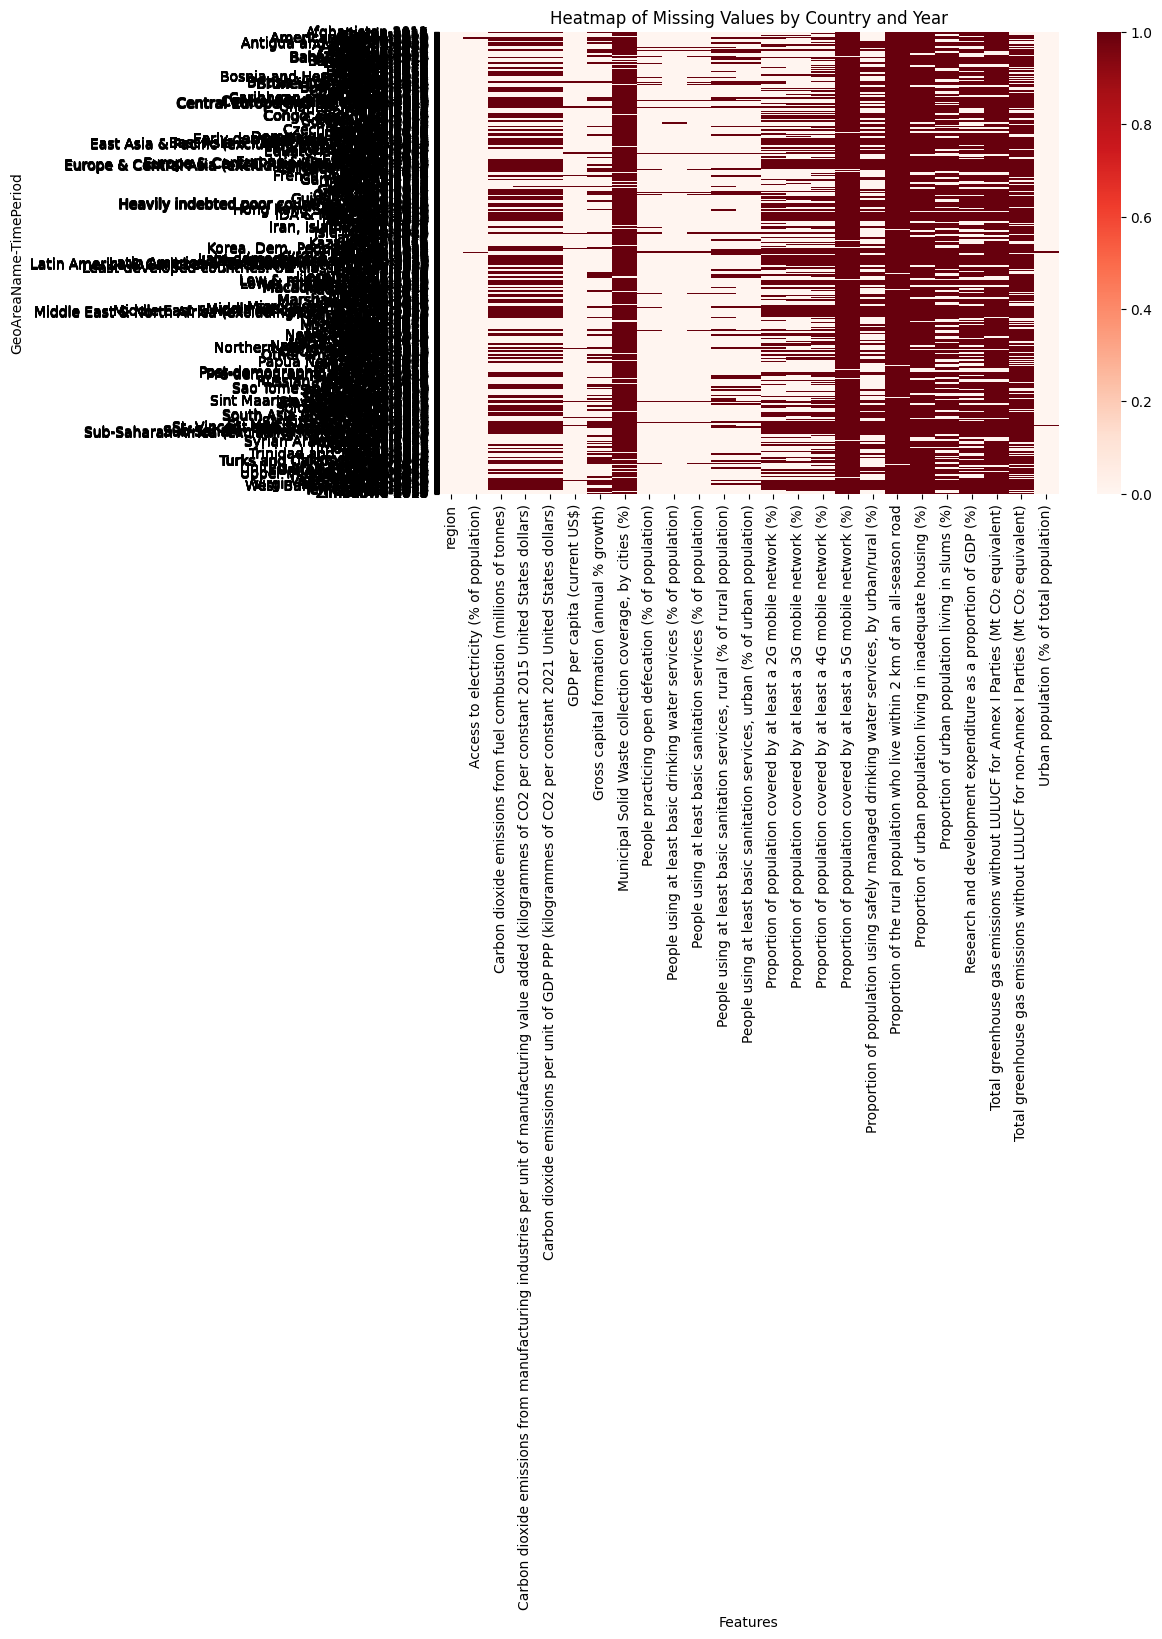

In [52]:
# Set multi-index (Country-Year)
df_indexed = final_df_flattened.set_index(['GeoAreaName', 'TimePeriod'])

# Check missing values (True if NaN, False otherwise)
missing = df_indexed.isnull()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing, cmap='Reds', cbar=True, yticklabels=True)
plt.title('Heatmap of Missing Values by Country and Year')
plt.xlabel('Features')
# plt.ylabel('GeoAreaName, TimePeriod')
plt.tight_layout()
plt.show()

In [53]:
## find features with greater than 60% of total missing values across the dataframe
missing_pct = missing.sum()*100/final_df_flattened.shape[0]
missing_pct[missing_pct>60]

SeriesDescription
Municipal Solid Waste collection coverage, by cities (%)                                     89.616858
Proportion of population covered by at least a 5G mobile network (%)                         97.356322
Proportion of the rural population who live within 2 km of an all-season road                99.157088
Proportion of urban population living in inadequate housing (%)                              88.237548
Proportion of urban population living in slums (%)                                           71.379310
Research and development expenditure as a proportion of GDP (%)                              69.501916
Total greenhouse gas emissions without LULUCF for Annex I Parties (Mt CO₂ equivalent)        85.823755
Total greenhouse gas emissions without LULUCF for non-Annex I Parties (Mt CO₂ equivalent)    78.544061
dtype: float64

In [54]:
# missing_pct

In [55]:
features_to_exclude = missing_pct[missing_pct>60].index.tolist()
len(features_to_exclude), features_to_exclude

(8,
 ['Municipal Solid Waste collection coverage, by cities (%)',
  'Proportion of population covered by at least a 5G mobile network (%)',
  'Proportion of the rural population who live within 2\xa0km of an all-season road',
  'Proportion of urban population living in inadequate housing (%)',
  'Proportion of urban population living in slums (%)',
  'Research and development expenditure as a proportion of GDP (%)',
  'Total greenhouse gas emissions without LULUCF for Annex I Parties (Mt CO₂ equivalent)',
  'Total greenhouse gas emissions without LULUCF for non-Annex I Parties (Mt CO₂ equivalent)'])

In [56]:
## features that are already covered by other features
drop_series = [
    'Proportion of population covered by at least a 3G mobile network (%)',
    'Proportion of population covered by at least a 4G mobile network (%)',
    'People using at least basic sanitation services, rural (% of rural population)',
    'People using at least basic sanitation services, urban (% of urban population)'
]
features_to_exclude.extend(drop_series)

In [57]:
final_cleaned_df = final_df_flattened.drop(columns=features_to_exclude)
final_cleaned_df.head()

SeriesDescription,GeoAreaName,TimePeriod,region,Access to electricity (% of population),Carbon dioxide emissions from fuel combustion (millions of tonnes),Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars),Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars),GDP per capita (current US$),Gross capital formation (annual % growth),People practicing open defecation (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Proportion of population covered by at least a 2G mobile network (%),"Proportion of population using safely managed drinking water services, by urban/rural (%)",Urban population (% of total population)
0,Afghanistan,2011,SAS,43.222019,NaN,NaN,NaN,591.190030,NaN,17.669144,50.827846,36.425149,85.0,20.21288,23.948
1,Afghanistan,2012,SAS,69.099998,NaN,NaN,NaN,638.845852,NaN,16.860403,53.403517,37.960809,88.0,21.12400,24.160
2,Afghanistan,2013,SAS,68.290649,NaN,NaN,NaN,624.315455,NaN,16.053442,56.014043,39.506018,88.6,22.03447,24.373
3,Afghanistan,2014,SAS,89.500000,NaN,NaN,NaN,614.223342,NaN,15.248276,58.659374,41.060966,89.0,22.94430,24.587
4,Afghanistan,2015,SAS,71.500000,NaN,NaN,NaN,556.007221,NaN,14.444733,61.339781,42.626023,89.2,23.85359,24.803


In [58]:
## find countries with all missing values

feat_country_all_missing ={}
for col in final_cleaned_df.columns:
  if col not in ['GeoAreaName',	'TimePeriod',	'region']:
    missing_col_count = final_cleaned_df.groupby('GeoAreaName')[col].apply(lambda x: x.isna().sum()).reset_index()
    all_missing_countries = missing_col_count[missing_col_count[col]==10]['GeoAreaName'].unique()
    for country in all_missing_countries:
      counrty_region = final_cleaned_df[final_cleaned_df['GeoAreaName']==country]['region'].unique().tolist()
      other_counrty_same_region = final_cleaned_df[~(final_cleaned_df['GeoAreaName'].isin(all_missing_countries)) & (final_cleaned_df['region'].isin(counrty_region))][['GeoAreaName','region']].drop_duplicates()
      if other_counrty_same_region.shape[0]==0:
        feat_country_all_missing[col] = [country]

In [59]:
feat_country_all_missing

{'Carbon dioxide emissions from fuel combustion (millions of tonnes)': ['World'],
 'Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars)': ['World'],
 'Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars)': ['World'],
 'Proportion of population covered by at least a 2G mobile network (%)': ['World'],
 'Proportion of population using safely managed drinking water services, by urban/rural (%)': ['World']}

In [60]:
# final_cleaned_df.groupby('region')['GeoAreaName'].agg(['nunique',set])

In [61]:
country_to_exclude = set()
for val in feat_country_all_missing.values():
  for i in val:
    country_to_exclude.add(i)
country_to_exclude

{'World'}

In [62]:
final_cleaned_df = final_cleaned_df[~final_cleaned_df['GeoAreaName'].isin(country_to_exclude)]
final_cleaned_df.head()

SeriesDescription,GeoAreaName,TimePeriod,region,Access to electricity (% of population),Carbon dioxide emissions from fuel combustion (millions of tonnes),Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars),Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars),GDP per capita (current US$),Gross capital formation (annual % growth),People practicing open defecation (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Proportion of population covered by at least a 2G mobile network (%),"Proportion of population using safely managed drinking water services, by urban/rural (%)",Urban population (% of total population)
0,Afghanistan,2011,SAS,43.222019,NaN,NaN,NaN,591.190030,NaN,17.669144,50.827846,36.425149,85.0,20.21288,23.948
1,Afghanistan,2012,SAS,69.099998,NaN,NaN,NaN,638.845852,NaN,16.860403,53.403517,37.960809,88.0,21.12400,24.160
2,Afghanistan,2013,SAS,68.290649,NaN,NaN,NaN,624.315455,NaN,16.053442,56.014043,39.506018,88.6,22.03447,24.373
3,Afghanistan,2014,SAS,89.500000,NaN,NaN,NaN,614.223342,NaN,15.248276,58.659374,41.060966,89.0,22.94430,24.587
4,Afghanistan,2015,SAS,71.500000,NaN,NaN,NaN,556.007221,NaN,14.444733,61.339781,42.626023,89.2,23.85359,24.803


In [63]:
all_cols = final_cleaned_df.columns
feature_cols = all_cols.drop(['GeoAreaName',	'TimePeriod',	'region'])

In [64]:
## correlation before imputing missing values
final_cleaned_df[feature_cols].corr()['Proportion of population using safely managed drinking water services, by urban/rural (%)']

SeriesDescription
Access to electricity (% of population)                                                                                                                      0.711198
Carbon dioxide emissions from fuel combustion (millions of tonnes)                                                                                           0.119034
Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars)   -0.139611
Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars)                                                    0.233376
GDP per capita (current US$)                                                                                                                                 0.545522
Gross capital formation (annual % growth)                                                                                                               

In [65]:
# final_cleaned_df['region'].unique()

In [66]:
final_cleaned_df.isna().sum()

SeriesDescription
GeoAreaName                                                                                                                                                     0
TimePeriod                                                                                                                                                      0
region                                                                                                                                                          0
Access to electricity (% of population)                                                                                                                        13
Carbon dioxide emissions from fuel combustion (millions of tonnes)                                                                                           1331
Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars)    1341
Carbon dio

In [67]:
## countries with any missing values
final_cleaned_df[(final_cleaned_df.isna().any(axis=1)) & ~(final_cleaned_df['region']=='')][['GeoAreaName','region']].drop_duplicates()

SeriesDescription,GeoAreaName,region
0,Afghanistan,SAS
19,Albania,ECS
20,Algeria,MEA
30,American Samoa,EAS
40,Andorra,ECS
...,...,...
2550,Virgin Islands (U.S.),LCN
2560,West Bank and Gaza,MEA
2580,"Yemen, Rep.",MEA
2590,Zambia,SSF


In [68]:
## Region level missing value imputation

for col in feature_cols:
    final_cleaned_df[col] = final_cleaned_df.groupby(['region', 'TimePeriod'])[col].transform(
        lambda x: x.fillna(x.mean())
    )

In [69]:
final_cleaned_df.isna().sum()

SeriesDescription
GeoAreaName                                                                                                                                                    0
TimePeriod                                                                                                                                                     0
region                                                                                                                                                         0
Access to electricity (% of population)                                                                                                                        0
Carbon dioxide emissions from fuel combustion (millions of tonnes)                                                                                           430
Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars)    430
Carbon dioxide e

In [70]:
## analysing countries with still missing values
final_cleaned_df[final_cleaned_df['Proportion of population covered by at least a 2G mobile network (%)'].isna()][['GeoAreaName','region']].drop_duplicates()

SeriesDescription,GeoAreaName,region
70,Arab World,
370,Caribbean small states,
400,Central Europe and the Baltics,
600,Early-demographic dividend,
610,East Asia & Pacific,
620,East Asia & Pacific (IDA & IBRD),
630,East Asia & Pacific (excluding high income),
720,Euro area,
730,Europe & Central Asia,
740,Europe & Central Asia (IDA & IBRD),


In [71]:
## as we can see above, these are not the countries but grouped regions, so dropping these from our dataset

final_cleaned_df = final_cleaned_df.dropna()
final_cleaned_df.head()

SeriesDescription,GeoAreaName,TimePeriod,region,Access to electricity (% of population),Carbon dioxide emissions from fuel combustion (millions of tonnes),Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars),Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars),GDP per capita (current US$),Gross capital formation (annual % growth),People practicing open defecation (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Proportion of population covered by at least a 2G mobile network (%),"Proportion of population using safely managed drinking water services, by urban/rural (%)",Urban population (% of total population)
0,Afghanistan,2011,SAS,43.222019,372.258,0.9588,0.1186,591.190030,6.526510,17.669144,50.827846,36.425149,85.0,20.21288,23.948
1,Afghanistan,2012,SAS,69.099998,401.982,1.0220,0.1212,638.845852,7.870495,16.860403,53.403517,37.960809,88.0,21.12400,24.160
2,Afghanistan,2013,SAS,68.290649,412.778,0.9378,0.1152,624.315455,-5.403038,16.053442,56.014043,39.506018,88.6,22.03447,24.373
3,Afghanistan,2014,SAS,89.500000,450.262,1.0262,0.1198,614.223342,12.263828,15.248276,58.659374,41.060966,89.0,22.94430,24.587
4,Afghanistan,2015,SAS,71.500000,460.030,1.0408,0.1176,556.007221,9.642426,14.444733,61.339781,42.626023,89.2,23.85359,24.803


In [72]:
final_cleaned_df[feature_cols].corr()['Proportion of population using safely managed drinking water services, by urban/rural (%)']

SeriesDescription
Access to electricity (% of population)                                                                                                                      0.697354
Carbon dioxide emissions from fuel combustion (millions of tonnes)                                                                                           0.128702
Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars)    0.048093
Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars)                                                    0.250996
GDP per capita (current US$)                                                                                                                                 0.530437
Gross capital formation (annual % growth)                                                                                                               

In [74]:
final_cleaned_df.to_csv('../data/final_cleaned_df.csv',index=False)

In [75]:
final_cleaned_df.shape

(2170, 15)

In [76]:
final_cleaned_df['region'].unique()

array(['SAS', 'ECS', 'MEA', 'EAS', 'SSF', 'LCN', 'NAC'], dtype=object)

In [77]:
# final_cleaned_df.groupby('region')['GeoAreaName'].agg(['nunique',set])
# final_cleaned_df[final_cleaned_df['GeoAreaName']=='Tuvalu']

In [78]:
# final_df_flattened[final_df_flattened['GeoAreaName']=='Tuvalu'][final_cleaned_df.columns.tolist()]

Analysing countries from same region

In [79]:
first10_countries = final_cleaned_df[final_cleaned_df['region']=='SAS']['GeoAreaName'].unique()[:10]
first10_countries

array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
       'Nepal', 'Pakistan', 'Sri Lanka'], dtype=object)

c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\prati\AppData\Local\Temp\ipykernel_28472\1394228344.py:14: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


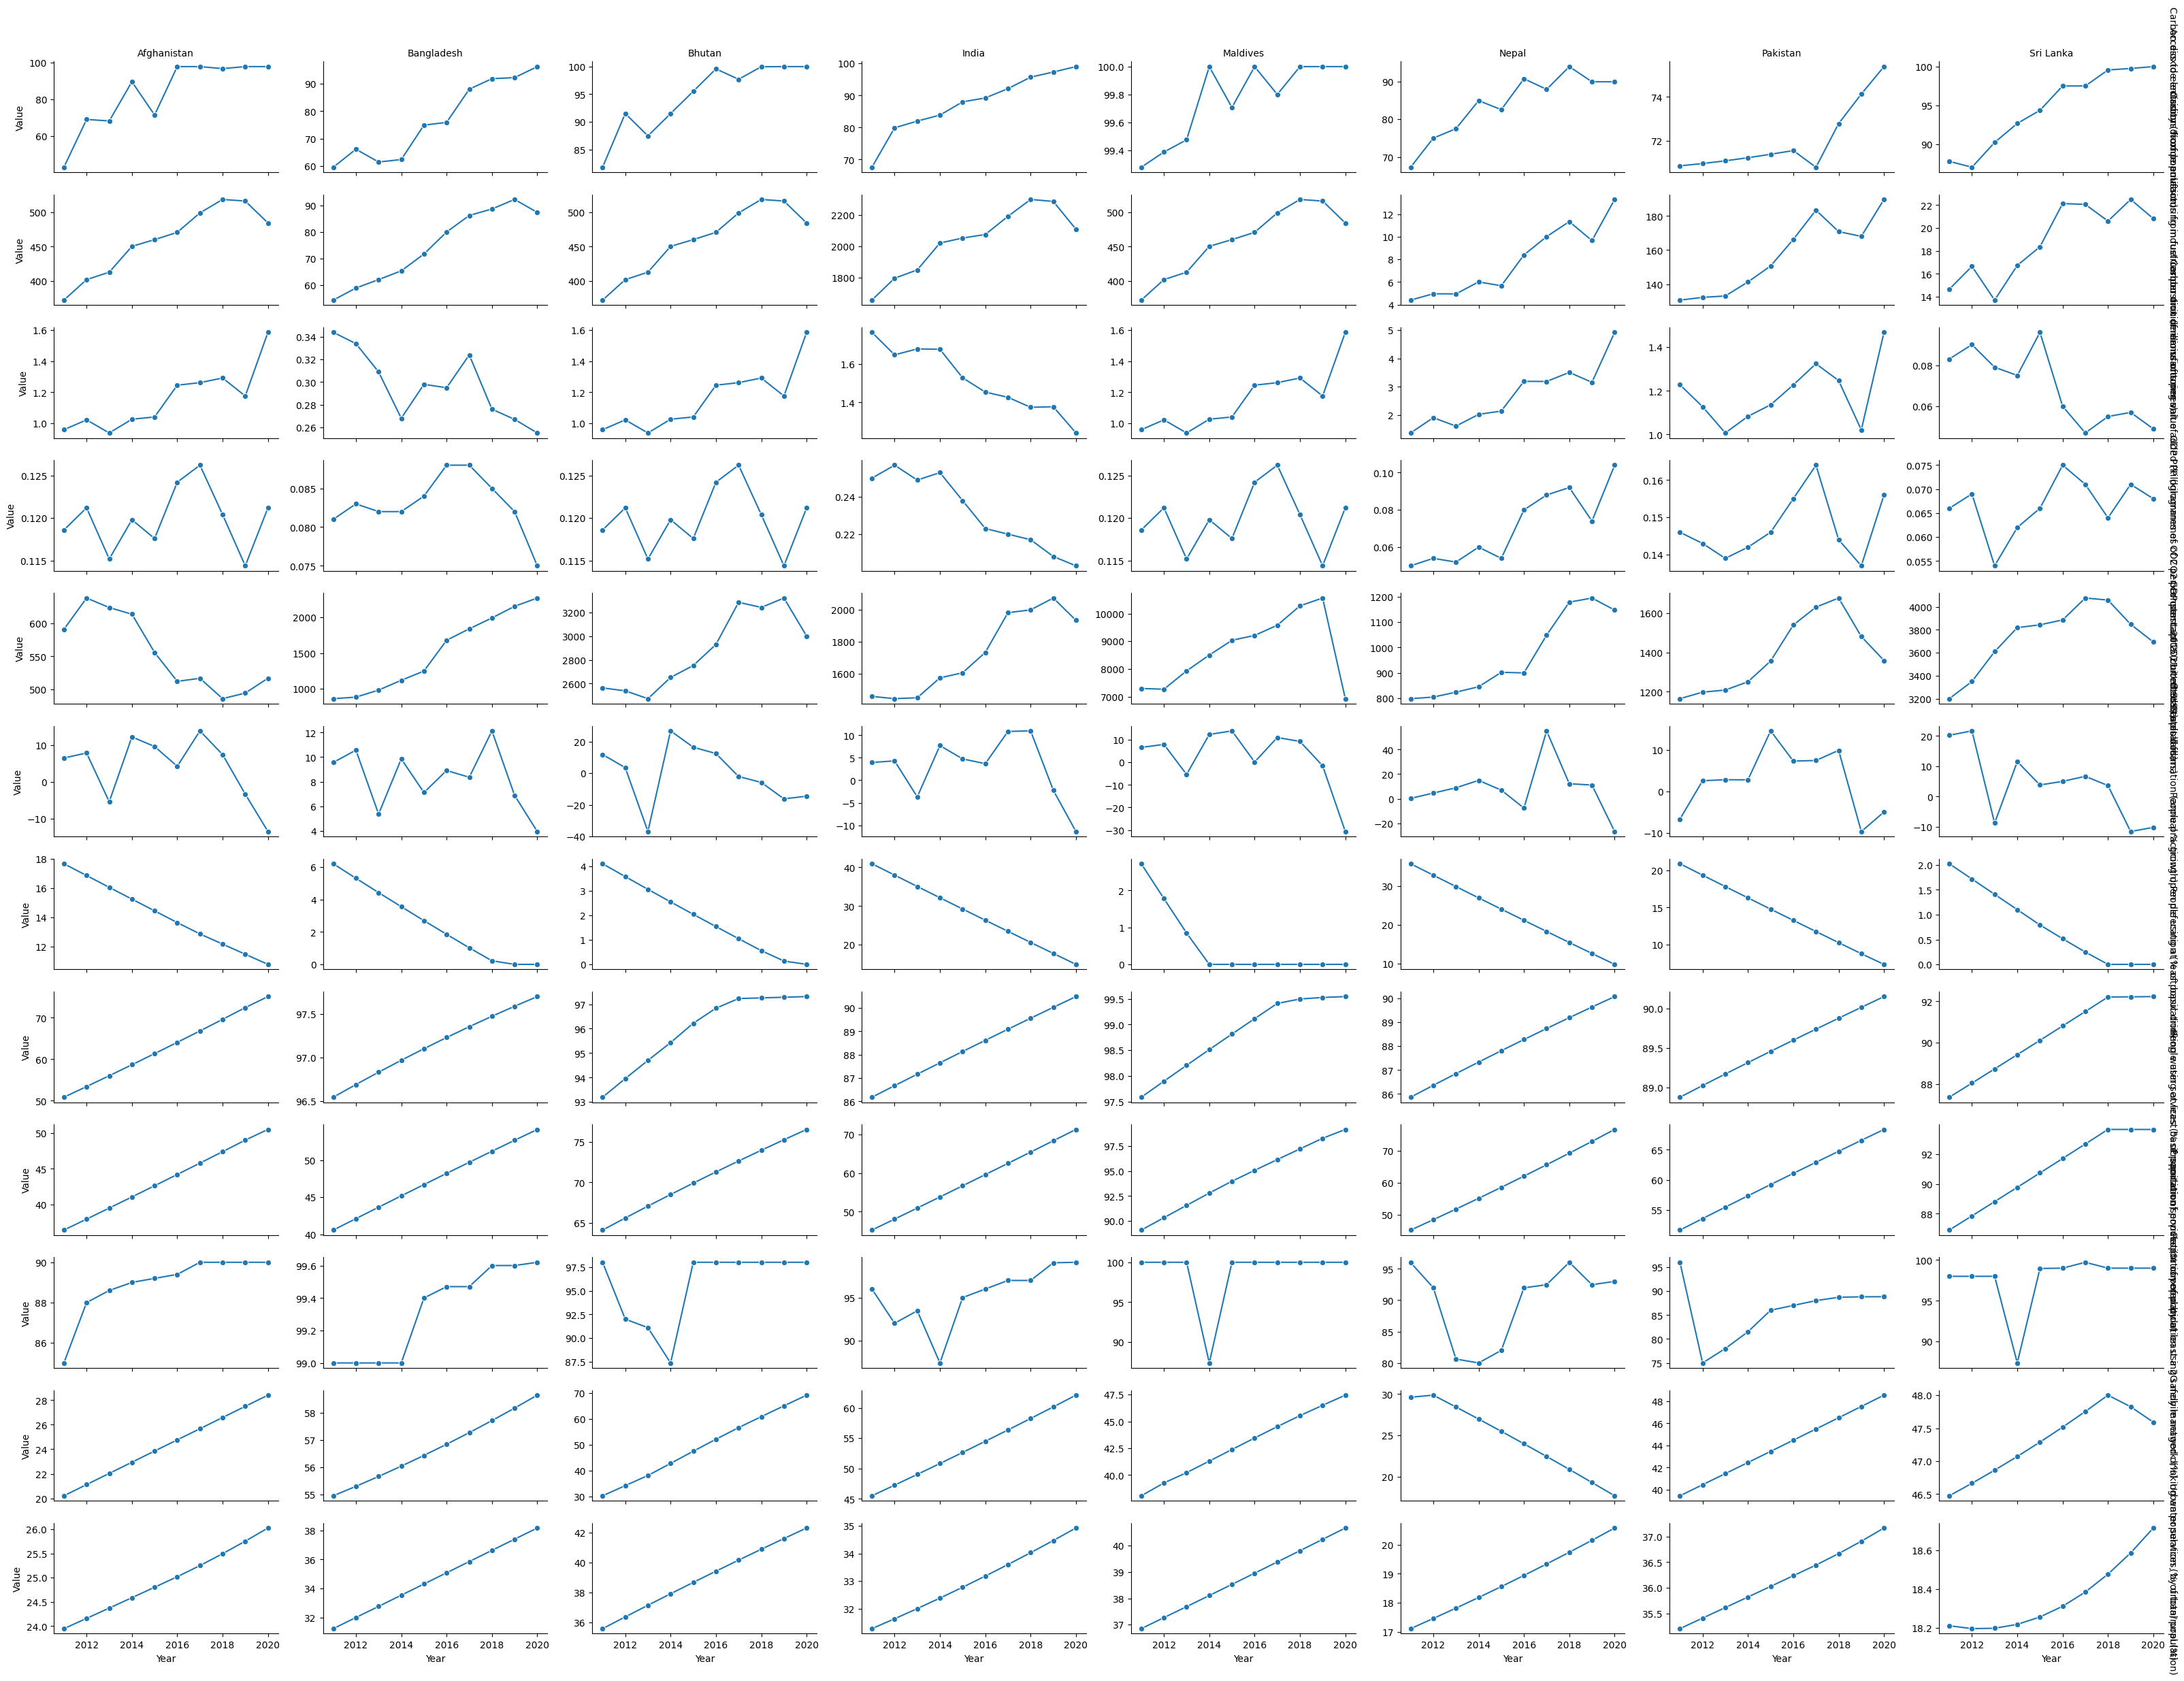

In [80]:
df_melted = final_cleaned_df[final_cleaned_df['GeoAreaName'].isin(first10_countries)].melt(id_vars=['GeoAreaName', 'TimePeriod'],
                    value_vars=feature_cols,
                    var_name='Feature',
                    value_name='Value')

g = sns.FacetGrid(df_melted, col="GeoAreaName", row="Feature", margin_titles=True,
                  sharey=False, sharex=True, height=2.5, aspect=2)


g.map(sns.lineplot, "TimePeriod", "Value", marker="o")

g.set_axis_labels("Year", "Value")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.tight_layout()
plt.show()